In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data

--2023-06-03 21:29:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1477391 (1.4M) [application/x-httpd-php]
Saving to: ‘magic04.data’

magic04.data        100%[===================>]   1.41M  3.56MB/s    in 0.4s    

2023-06-03 21:29:56 (3.56 MB/s) - ‘magic04.data’ saved [1477391/1477391]



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", 
        "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
### ПРЕОБРАЗОВАНИЕ данных в столбце "class" (g, h) в двоичный вид 0, 1
df['class'] = (df["class"] == "g").astype(int)

In [5]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


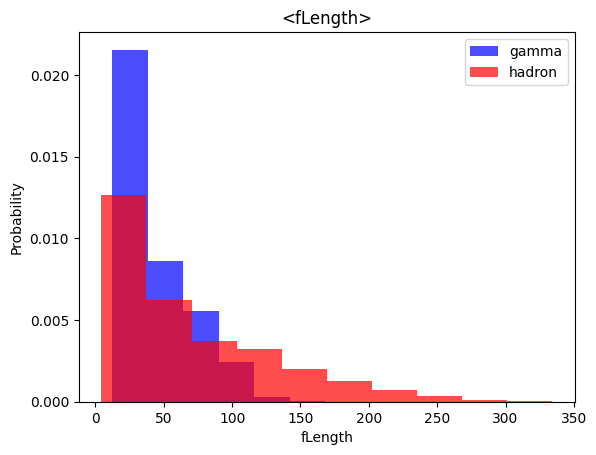

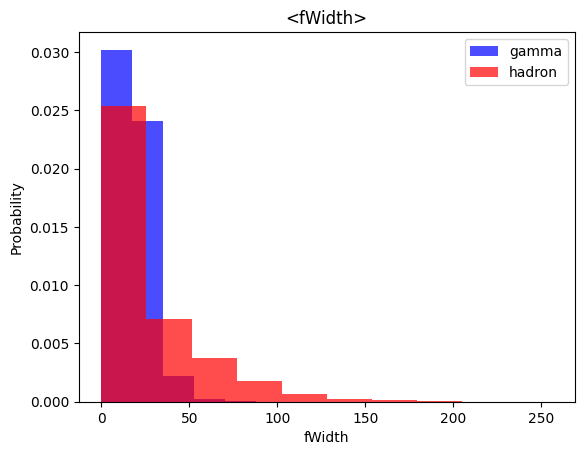

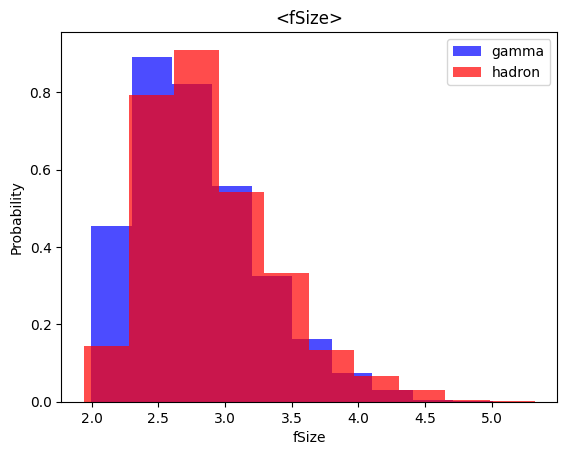

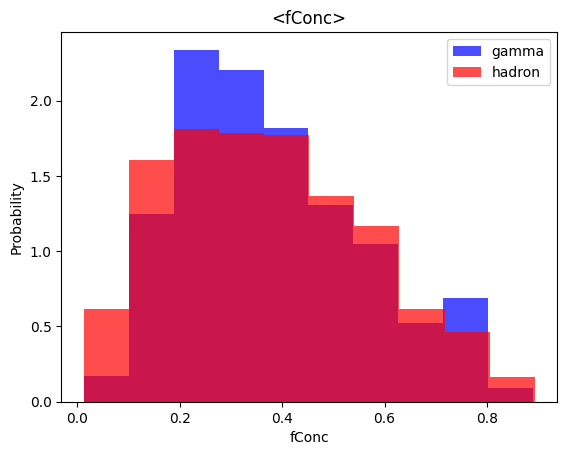

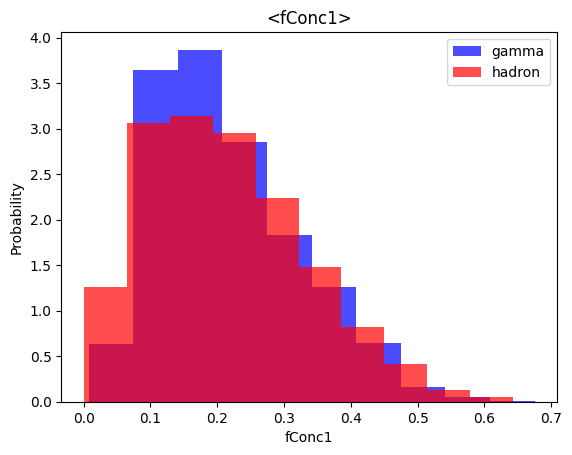

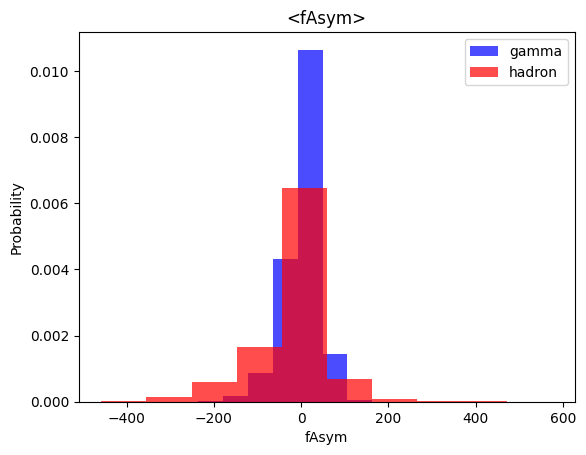

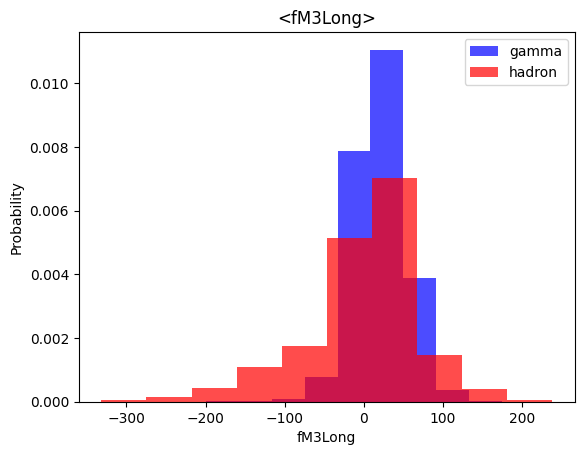

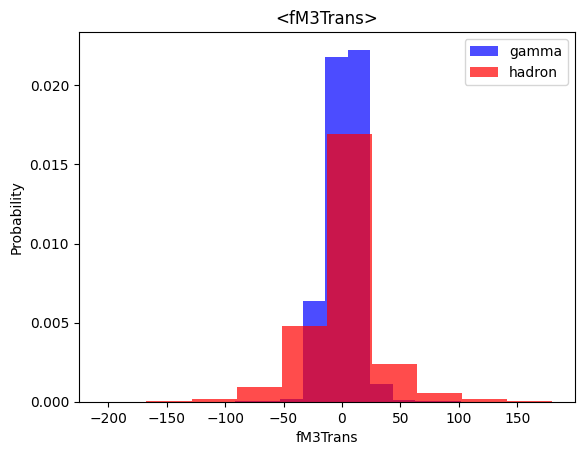

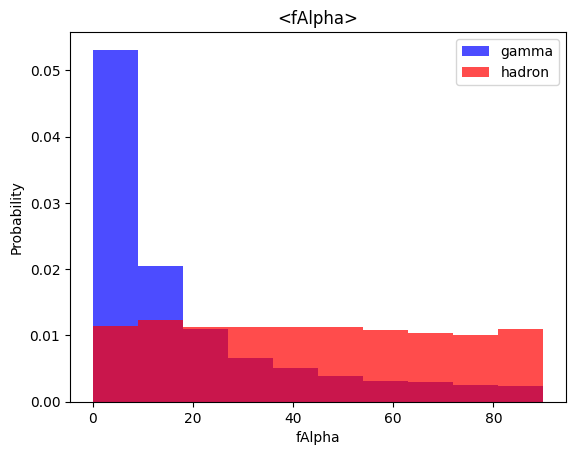

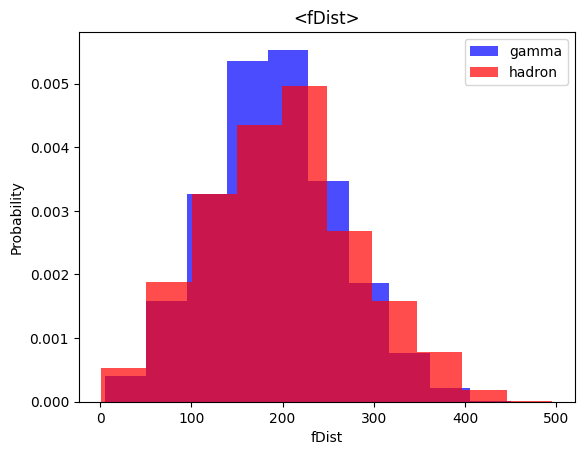

In [6]:
# Визуальный анализ корреляции по гистограмме(наиболее интересный раздел - fAlpha)

for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color="blue", label="gamma", alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color="red", label="hadron", alpha=0.7, density=True)
  plt.title('<'+label+'>')
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
# Подготовка данных (Preparing Data)
# разделяем на случаные подвыборки, где train - 60% датасета, а valid & test - по 20%

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [8]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3701,38.5309,21.3117,2.7980,0.2580,0.1377,7.3695,24.4292,-12.4856,23.4357,151.1810,1
1917,36.0591,20.1264,2.9941,0.2889,0.1556,44.6572,24.9777,11.2823,17.9680,62.9514,1
5196,21.0228,16.2076,2.5670,0.4282,0.2236,-20.5324,-13.6002,-4.7962,22.6203,113.8630,1
13035,112.4290,51.2607,3.7315,0.0926,0.0496,-80.9799,82.8492,41.6052,12.0370,253.9980,0
14956,51.2755,26.1717,2.9442,0.1675,0.0643,-37.5337,-26.8600,17.3136,4.1303,120.6350,0
...,...,...,...,...,...,...,...,...,...,...,...
13727,14.0343,8.5698,2.4040,0.8757,0.4477,14.7287,4.5391,-11.2749,13.2698,123.2160,0
16988,36.3872,10.4131,2.8169,0.5015,0.2645,13.9003,25.0252,11.1582,54.7560,210.1880,0
7820,76.7605,21.3045,2.9854,0.2203,0.1143,-105.9950,48.8670,12.6649,4.1410,279.8310,1
2408,12.3331,12.1588,2.1414,0.6715,0.3430,-17.0704,10.7468,1.0079,17.4440,199.9890,1


In [9]:
valid

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
7419,23.0564,15.9993,2.4955,0.4760,0.3115,-9.0445,-22.4763,-11.0232,15.2770,100.7640,1
12015,85.8538,16.1019,2.6117,0.4866,0.2971,41.2975,98.9232,-14.1160,15.7700,205.1240,1
15311,145.6048,81.2550,3.6376,0.1232,0.0694,66.2417,-103.8861,-47.3822,54.4519,326.1046,0
6396,27.6730,12.2087,2.3493,0.4251,0.2170,21.6289,-14.5838,-9.3565,10.6699,203.4730,1
2728,64.0183,26.8934,3.2139,0.1900,0.1072,4.0659,47.5424,16.6488,2.9665,171.3190,1
...,...,...,...,...,...,...,...,...,...,...,...
5068,24.3893,13.9437,2.5092,0.4830,0.2709,5.2824,20.1263,7.0536,35.9740,165.6830,1
12833,133.9489,38.3972,3.0833,0.2517,0.1421,89.9043,128.2511,26.3516,43.5612,32.7130,0
17504,14.5342,14.2628,2.4436,0.6164,0.3491,-2.6279,6.6097,14.1405,18.9516,201.3046,0
933,61.9494,31.0583,3.2648,0.1516,0.0834,7.1659,47.9741,10.9651,0.8530,241.3740,1


In [10]:
test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
7373,29.2277,22.3943,2.8503,0.3035,0.1546,11.9367,21.8996,-19.2040,17.3452,164.0890,1
9193,46.2564,19.1547,2.9609,0.2276,0.1220,52.6054,21.5971,-10.3703,6.5852,161.6990,1
968,20.6484,6.9116,2.1319,0.7675,0.4391,20.9065,14.3220,5.8024,7.4140,100.5480,1
18408,102.4160,35.3969,3.2633,0.2236,0.1257,-55.9134,-44.7467,-21.6428,23.1906,367.7340,0
12996,31.6082,10.4765,2.6699,0.4564,0.2321,-13.0004,14.2189,4.7111,56.6679,39.2281,0
...,...,...,...,...,...,...,...,...,...,...,...
1612,50.7517,25.7097,3.3698,0.1579,0.0792,29.4191,-13.9810,14.7461,6.3920,211.2380,1
12242,29.2617,12.7089,2.5422,0.3644,0.1994,15.8677,11.6095,9.1450,6.8790,136.7420,1
7800,43.2269,23.1740,2.9743,0.2164,0.1141,47.9553,35.3128,10.3147,26.0548,282.8430,1
7272,68.1693,29.6106,2.9605,0.2924,0.1824,-68.2229,38.9137,20.9574,3.5850,262.1120,1


In [11]:
print(len(train[train["class"] == 1])) # кол-во gamma 
print(len(train[train["class"] == 0])) # кол-во hadron

# ВЫВОД - количество сильно разнится, надо подравнять ;) 

7371
4041


In [12]:
def scale_dataframe(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # столбцы для тренировки(все кроме последнего)
  y = dataframe[dataframe.columns[-1]].values # столбцы для сравнения ответов(последний)

  scaler = StandardScaler() # преобразование данных (стандартизировать объем входящих данных)
  X = scaler.fit_transform(X) # то, на чем будем обучать

  if oversample:                  # Если размеры не совпадают - подгоняем
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) # сложение 2-мерных массивов + подгонка массива "y" под двумерный размер

  return data, X, y 

In [13]:
train, X_train, y_train = scale_dataframe(train, oversample=True) # формируем и балансируем тренировочные данные
valid, X_valid, y_valid = scale_dataframe(valid, oversample=False) # формируем без баланса валидные данные
test, X_test, y_test = scale_dataframe(test, oversample=False) # формируем без баланса тестовые данные

In [14]:
print(sum(y_train == 1)) # кол-во gamma 
print(sum(y_train == 0)) # кол-во hadron

# ВЫВОД - теперь все ровненько и душевно
# P.s. только тренировочные данные надо балансИровать, валидные и тестовые должны быть случайными

7371
7371


In [15]:
#Сравнение размерностей валидных данных и тестовых(должны быть несбалансированными)
print(sum(y_valid == 1)) # кол-во gamma у валида
print(sum(y_valid == 0)) # кол-во hadron у теста
print("----")
print(sum(y_test == 1)) # кол-во gamma у теста
print(sum(y_test == 0)) # кол-во hadron у теста

2492
1312
----
2469
1335


# Метод k-ближайших соседей(kNN).  Основной принцип на фото:


![kNN](https://i.imgur.com/w03l3aP.png)

*Общий принцип - сравнение классов соседних и подходящих по параметрам строк. Если в диапазоне соседей больше всего встречается класс 1, то скорее всего и неизвестная ячейка равна 1, и наоборот с 2.*

**Работа с обучением kNN**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=10)

knn_model.fit(X_train, y_train) # передаем тренировочные данные (обучаем алгоритм)

y_pred = knn_model.predict(X_test) # предиктим модель на тестовых данных(предугадываем результаты)

In [18]:
y_pred, y_test # визуально можем сравнить что совпало, а что нет

(array([1, 1, 1, ..., 1, 1, 0]), array([1, 1, 1, ..., 1, 1, 0]))

In [19]:
print(classification_report(y_test, y_pred)) # смотрим полную статистику по сравнению и качество применения алгоритма

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1335
           1       0.86      0.85      0.86      2469

    accuracy                           0.81      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.81      0.81      3804



*На заметку: accuracy - точность*

# Что такое recall и precision

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width="300">


# Алгоритм Naive Bayes classifier(Наивный байесовский классификатор)

<img src='https://i.imgur.com/5YI93Az.png'>
Принцип работы: Сравнение вероятностей общего класса, но разных исходов в нем

In [20]:
from sklearn.naive_bayes import GaussianNB

In [29]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train) # передаем тренировочные данные (обучаем алгоритм)

In [34]:
y_pred_nb = nb_model.predict(X_test) # предиктим модель на тестовых данных(предугадываем результаты)

In [31]:
y_pred_nb, y_test # визуально можем сравнить что совпало, а что нет

(array([1, 1, 1, ..., 1, 1, 1]), array([1, 1, 1, ..., 1, 1, 0]))

In [32]:
print(classification_report(y_pred_nb, y_test)) # смотрим полную статистику по сравнению и качество применения алгоритма

              precision    recall  f1-score   support

           0       0.41      0.70      0.52       780
           1       0.90      0.74      0.81      3024

    accuracy                           0.73      3804
   macro avg       0.66      0.72      0.66      3804
weighted avg       0.80      0.73      0.75      3804



*Болле низкая точность Наивного Бейсовского алгоритма в нашем случае связана с его принципом работы и со структурой нашего датасета*

# Алгоритм Логистическая регрессия (Logistic regression)

<img src="https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-Lw70vAIGPfRR1AjprLi%2F-LwAVc1EdfmPMge5dlYC%2Fimage.png?alt=media&token=d72e3231-0d64-4bb7-9e4c-20577940763d">

*Общий принцип работы - найти наиболее подходящие коэффиценты и параметры для задания функции так, чтобы лучше всего поделить данные на 2 класса*

In [33]:
from sklearn.linear_model import LogisticRegression

In [35]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train) # передаем тренировочные данные (обучаем алгоритм)

In [36]:
y_pred_lg = lg_model.predict(X_test) # предиктим модель на тестовых данных(предугадываем результаты)

In [37]:
y_pred_lg, y_test

(array([1, 1, 1, ..., 1, 1, 0]), array([1, 1, 1, ..., 1, 1, 0]))

In [38]:
print(classification_report(y_pred_lg, y_test)) # смотрим полную статистику по сравнению и качество применения алгоритма

              precision    recall  f1-score   support

           0       0.71      0.68      0.70      1405
           1       0.82      0.84      0.83      2399

    accuracy                           0.78      3804
   macro avg       0.77      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804

